![logo](./img/LogoLine_horizon_C3S.png)

# The Total Solar Irradiance (TSI) from RMIB

This notebook provides a practical introduction to the Total Solar Irradiance (TSI) dataset available at the Copernicus Climate Change Service (C3S) [Climate Data Store (CDS)](https://cds.climate.copernicus.eu/#!/home).

The notebook begins with an introduction to the TSI variable and the dataset overview. Next, it provides instructions for setting up and running the notebook. It describes the steps to set up a python environment, and access and prepare the data. Following this setup, the notebook presents two practical use cases of the dataset: plotting the TSI daily values and a 12-month rolling mean (Use Case 1), and plotting two TSI datasets side-by-sides (Use Case 2).

The figure below is the result of Use Case 1, and the result of a successful run of the code.

## Table of Contents

1. Introduction
2. Prerequisites and data preparations
3. Use cases
    * Use case 1: Time series of the Total Solar Irradiance (TSI)
    * Use case 2: Comparison of two TSI composites
4. References


## 1. Introduction

The Total Solar Irradiance (TSI) is the measure of the energy input that the Earth receives from the Sun. It is the dominant driver of the Earth's climate, a key component of the Earth’s Radiation Budget (ERB), and is thus one of the Global Climate Observing System (GCOS) Essential Climate Variables (ECVs). Stable and accurate long-term TSI records are needed for climate studies, e.g. to understand the influence of solar variability on climate.
    
The TSI exhibits large day-to-day variations due to the passage of dark sunspots, and bright faculae. The well-known 11-year solar cycle is also being directly observed by space-based instruments. There exist other regular and irregular factors that contribute to the short-term variations of TSI. Fortunately, the TSI is very stable in the long timescales, century to multi-century (thus the historical name "the solar constant", now usually referred to as Total Solar Irradiance (TSI)).

This TSI dataset provides daily TSI observations for over 44 years. It is a composite dataset, meaning that it is constructed from different TSI measurements obtained by an ensemble of space instruments, and carefully combined into one homogeneous dataset.

This dataset is produced on behalf of C3S by the Royal Meteorological Institute of Belgium (RMIB).

Please find further information about the dataset as well as the data in the Climate Data Store catalogue entry Earth's Radiation Budget, sections "Overview", "Download data" and "Documentation": 
- [Earth's Radiation Budget from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-earth-radiation-budget?tab=overview)

A [tutorial video](https://datastore.copernicus-climate.eu/documents/satellite-earth-radiation-budget/C3S2_312a_Lot1.4.0.3_202306_Tutorial_ECV_EarthRadiationBudget_final.mp4) describes the "Earth Radiation Budget" Essential Climate Variable and the methods and satellite instruments used to produce the data provided in the CDS catalogue entry.

## 2. Prerequisites and data preparations
This chapter provides information on how to: run the notebook, lists necessary python libraries, and guides you through the process of the  preparation: how to search and download the data via CDS API and get it ready to be used.

### 2.1 How to access the notebook

This tutorial is in the form of a [Jupyter notebook](https://jupyter.org/). This tutorial can also be run on a cloud environment, or on your own computer. Here are some suggestions, simply click on one of the links below to launch this notebook in the cloud environment. To run the code, press "Run - Run All Cells". Once you feel comfortable with the python code, you are invited to adjust or extend the code according to your interests.

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training-c3s/main?labpath=C3S_TSI.ipynb">
        <img src = "https://mybinder.org/badge.svg" alt = "Binder"></th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/copernicus-training-c3s/blob/main/C3S_TSI.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
  </tr>
</table> 

We are using `cdsapi` to download the data. This package is not yet included by default on most cloud platforms. You can use `pip` to install it:

```!pip install cdsapi```

**Run the tutorial in the local environment**  

If you would like to run this notebook in your own environment, download this notebook as an `ipynb` file. We suggest you install [Anaconda](https://docs.anaconda.com/anaconda/install/) or [mamba](https://mamba.readthedocs.io/en/latest/), which contains most of the libraries you will need.
We will be working with data in ASCII format. `pandas` is a Python library for data manipulation and analysis. It is used to read, process, and write ASCII files such as TXT or CSV. We will also need libraries for plotting and viewing data, in this case, we will use `Matplotlib`. [cdsapi](https://cds.climate.copernicus.eu/api-how-to) is a Python library for programmatically accessing the data from the CDS.

### 2.2 Import libraries

We need to import the libraries to ensure that all necessary functions and modules are available for use throughout the script's execution.

In [19]:
# CDS API library
import cdsapi

# Library for data manipulation and analysis
import pandas as pd

# Libraries to work with zip-archives, pattern expansion, operating system interfaces
import zipfile
import glob
import os

# Library for plotting and visualising data
import matplotlib.pyplot as plt

### 2.3 Download data using CDS API

This tutorial assumes that you have installed the cdsapi and configured you .cdsapirc file with your key, as described in the "Climate Data Store Tutorial".


First, we specify a data directory in which we will download our data and all output files that we will generate. Using `os` library, we create the data directory if it does not already exist.

In [20]:
DATADIR = './data_dir/'
os.makedirs(DATADIR, exist_ok=True)

#### Search for data

To search for data, visit the CDS website: https://cds.climate.copernicus.eu/cdsapp#!/home.
Here you can search for TSI data using the search bar. The data we need for this use case is the [Earth's Radiation Budget from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-earth-radiation-budget?tab=overview).
The Earth Radiation Budget (ERB) comprises the quantification of the incoming radiation from the Sun and the outgoing reflected shortwave and emitted longwave radiation. This catalogue entry comprises data from a number of sources.

Having selected the correct catalogue entry, we now need to specify what origin, variables, temporal and geographic coverage we are interested in. 
These can all be selected in the **"Download data"** tab. In this tab, a form appears in which we will select the following parameters to download:

- Product family: `TSI (Total Solar Irradiance)`
- Origin: `RMIB (Royal Meteorological Institute of Belgium)`
- Variable: `Total Solar Irradiance (TSI)`
- Climate data record type: `Interim Climate Data Record (ICDR)`
- Time aggregation: `Daily mean`
- Format: `Compressed zip file (.zip)`

If you have not already done so, you will need to accept the **terms & conditions** of the data before you can download it.

At the end of the download form, select **`Show API request`**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below).

In [21]:
c = cdsapi.Client()

c.retrieve(
    'satellite-earth-radiation-budget',
    {
        'variable': 'total_solar_irradiance',
        'product_family': 'tsi',
        'origin': 'rmib',
        'climate_data_record_type': 'interim_climate_data_record',
        'time_aggregation': 'daily_mean',
        'format': 'zip',
    },
    f'{DATADIR}TSI_data.zip')


2024-08-21 15:11:34,060 INFO [2024-01-09T00:00:00] NOAA/NCEI HIRS OLR was reprocessed from 2007 till 2023. Please see the Known issues section under the Documentation tab for more details.
2024-08-21 15:11:34,061 INFO Request ID is 4a0a9daa-dbd1-482c-82a3-8cfa53f85da8
2024-08-21 15:11:34,136 INFO status has been updated to accepted
2024-08-21 15:11:35,716 INFO status has been updated to successful


f3f64436003ccf9797a0c37a35940b79.zip:   0%|          | 0.00/3.36M [00:00<?, ?B/s]

'./data_dir/TSI_data.zip'

#### Unpack the data

We use `zipfile` module to extract the content of the archive we just downloaded. The file is extracted into the specified directory path, represented by the `DATADIR` variable.

In [22]:
with zipfile.ZipFile(f'{DATADIR}TSI_data.zip', 'r') as zip_ref:
    zip_ref.extractall(f'{DATADIR}')

## 3. Use Cases

### Use case 1: Time series of the Total Solar Irradiance (TSI)

In this learning material, we visualize the time evolution of the Total Solar Irradiance (TSI) using daily values and a 12-month rolling mean. This visualization helps us understand the variations in TSI over time.

#### Load dataset, subselect and calculate a temporal mean

First, we need to read the file and prepare the dataset for analysis and plotting.
 
The TSI data is stored in an ASCII file. We use `pandas` to read the file. The TSI dataset is constantly updated, which is why we need to use glob to get the latest filename.

We read a dataset file specified by the filename variable using pandas `pd.read_csv()` into the DataFrame. The file has a header with 128 lines of metadata that is skipped during the reading process. We extract columns 1 and 2 (starting from zero) from the CSV file, naming them as "TSI" and "JD" respectively, and set the "JD" column as the DataFrame's index. The "JD" column contains special dates called Julian days, which are a way to represent time. The Julian day is the continuous integer count of days, it is used for easily calculating elapsed days between two events.

As the next, we convert these Julian days to a datetime format using `pd.to_datetime()` and set units as Date.
Finally, we use lambda-function to set the time to midnight (00:00:00) for each date, effectively discarding the time information, and leaving only the date component in the index.


In [23]:
filename = glob.glob(f'{DATADIR}C3S_RMIB_daily_TSI_composite_ICDR*.txt')[0]

# read the file
data = pd.read_csv(
    filename, header=128, sep=' ',
    usecols=[1, 2], names=["TSI", "JD"], index_col=1, encoding= 'unicode_escape'
)
# convert julian date values to a datetime format
data.index = pd.to_datetime(data.index, origin='julian', unit='D')
# set time to midnight using lambda-function
data.index = data.index.map(lambda x: x.replace(hour=0, minute=0, second=0))

#### Print header information to learn about the dataset

The header contains general information about the dataset, satellite instruments used to create a composite dataset, and columns are explained. A peer-reviewed article by (Dewitte et al, 2016) describes the dataset in detail. The Product User Guide and Specification (PUGS, Clerbaux et al, 2023) provides the information a user should need for an appropriate use of the TSI data.

In [24]:
# read the dataset metadata from the header
with open(filename, 'r') as file:
    header_lines = [next(file) for _ in range(128)]

# print the information
print("".join(header_lines))

# Copernicus Climate Change Service (C3S) daily Total Solar Irradiance (TSI) timeseries
# 
# The TSI is the total amount of solar radiation, i.e. integrated over all the wavelengths, at the mean  
# Earth-Sun distance (1 AU). Given its direct impact on the Earth Radiation Budget (ERB), it is one of  
# the Essential Climate Variables (ECV) defined by the GCOS. 
# 
# This C3S timeseries provides an estimate of the daily TSI computed as a composite of different
# space instruments (see list below). 
# 
# CDR type     : ICDR (Interim Climate Data Record)
# CDR version  : v3.2
# 
# CDR provider : Royal Meteorological Institute of Belgium (RMIB)
# Contract     : C3S2_312a_lot1                                
# 
# Temporal resolution   : daily mean
# CDR (final) period    : 19790101 - 20201231
# ICDR (interim) period : 20210101 - 20231231
# 
# Creation date and time (YYYYMMDD_hhmmss) : 20240320_155857
# Software version                         : v3.0
# 
# Instruments and models :
# ---------

#### Plot data

We want to save objects `figure` and `axes` to use later. We use [Matplotlib](https://matplotlib.org/stable/index.html) to create a high-quality plot. Before plotting we need to prepare daily values and a 12-month rolling mean.


The rolling mean is a statistical technique used to smooth out data by calculating the average of a specified window of values. In our case, the window is 365 days or 12 months.

By applying the rolling mean to the TSI dataset spanning from 1979 to 2023, we can clearly observe the presence of three distinct solar cycles. These cycles represent periods of varying solar activity and are characterized by the rise and fall of sunspot numbers and other solar phenomena. Solar cycle 22, spanning from 1986 to 1996, is followed by solar cycle 23, which occurred from 1996 to 2008. Finally, solar cycle 24 took place from 2008 to 2019. These solar cycles demonstrate the cyclic nature of solar activity and its influence on the TSI measurements.

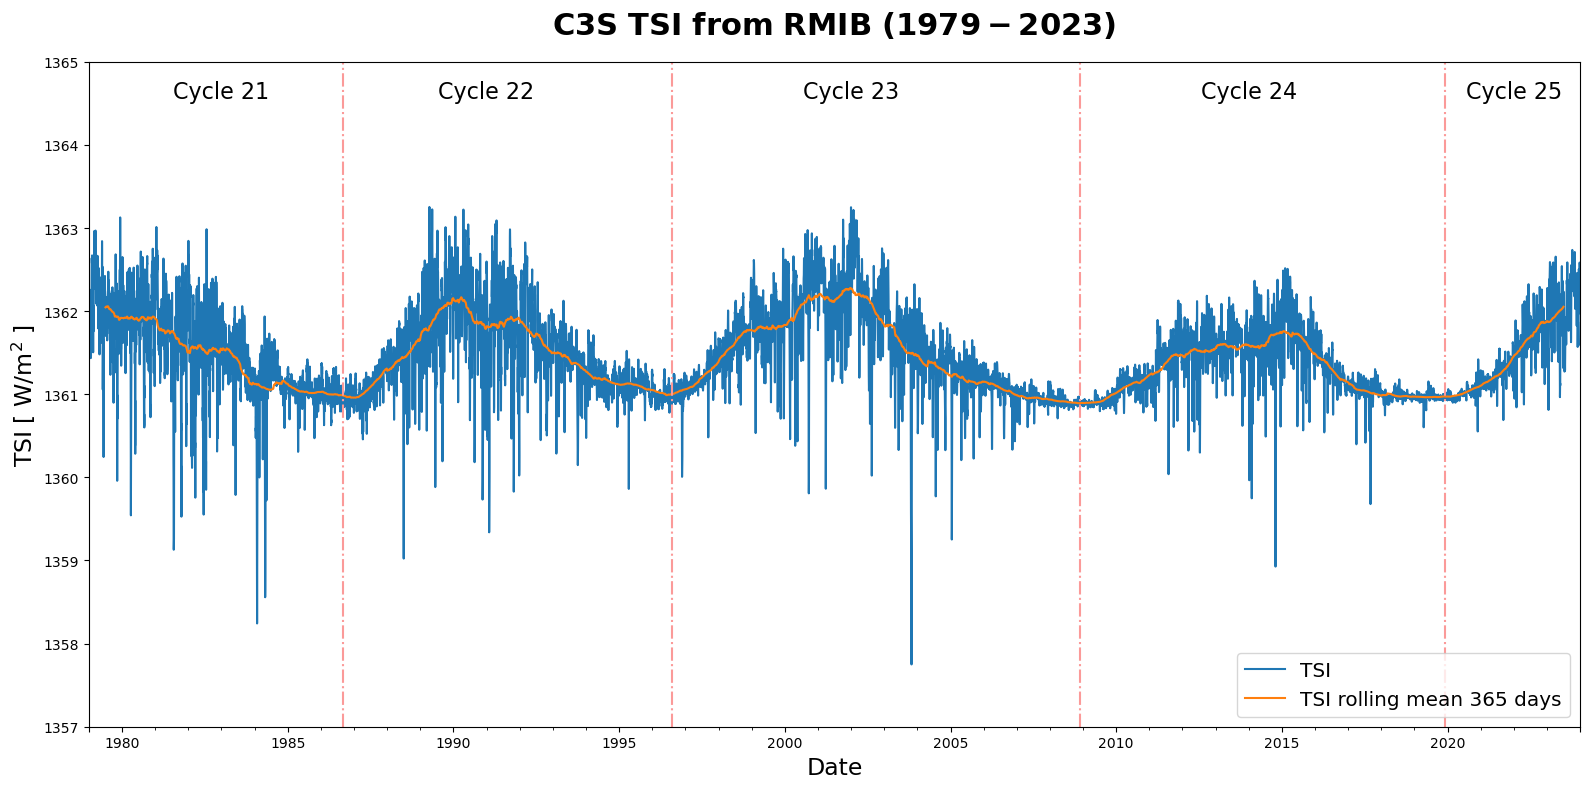

In [25]:
# Save figure and axes objects to modify later
fig1, ax1 = plt.subplots(1, 1, figsize=[16, 8])

# Actual plotting of the data
data.TSI.rolling(window=1).mean().plot()
data.TSI.rolling(window=365, center=True).mean().plot(legend=True)

# Adding title, x,y labels, and legend at lower right corner
ax1.set_ylim(1357, 1365)
ax1.set_title('$\\bf{C3S\\ TSI\\ from\\ RMIB\\ (1979-2023)}$',fontsize=22, pad = 20)
ax1.set_ylabel('TSI [ W/m$^2$ ]', fontsize=17)
ax1.set_xlabel('Date', fontsize=17)
ax1.legend(["TSI", "TSI rolling mean 365 days"], loc="lower right", fontsize='x-large')

# Adding vertical lines and labels to distinguish solar cycles
ax1.axvline(pd.to_datetime('1986-09-01'), color="#fb9a99", linestyle="-.")
ax1.axvline(pd.to_datetime('1996-08-01'), color="#fb9a99", linestyle="-.")
ax1.axvline(pd.to_datetime('2008-12-01'), color="#fb9a99", linestyle="-.")
ax1.axvline(pd.to_datetime('2019-12-01'), color="#fb9a99", linestyle="-.")
ax1.text(pd.to_datetime('1983-01-01'), 1364.5, "Cycle 21", ha="center", va="bottom", color="k", fontsize=16)
ax1.text(pd.to_datetime('1991-01-01'), 1364.5, "Cycle 22", ha="center", va="bottom", color="k", fontsize=16)
ax1.text(pd.to_datetime('2002-01-01'), 1364.5, "Cycle 23", ha="center", va="bottom", color="k", fontsize=16)
ax1.text(pd.to_datetime('2014-01-01'), 1364.5, "Cycle 24", ha="center", va="bottom", color="k", fontsize=16)
ax1.text(pd.to_datetime('2022-01-01'), 1364.5, "Cycle 25", ha="center", va="bottom", color="k", fontsize=16)

plt.tight_layout()
plt.show()

# and save the figure
fig1.savefig('Example_1_TSI_timeseries.png', dpi=300, bbox_inches='tight')

### Use case 2: Side-by-side composite products

The existing 44+ year TSI Climate Data Record (CDR) is the result of several overlapping TSI instruments onboard different satellites. Another well-known composite TSI data are produced by the Naval Research Laboratory (NRL). Each organization collects TSI measurements from various satellite instruments and combines them to create a composite dataset that represents the overall TSI variations over time. In this usecase, we will plot these two composite datasets side-by-side.

#### Download the NRL dataset, subselecting the time range

The NRL TSI dataset is made available through LaTiS, which is a data-serving system. It offers multiple methods to access the dataset, providing users with different options to retrieve the data according to their needs or preferences. We then download the selected parameters using a command-line utility `wget`.

* `nrl2_tsi_P1D.csv`: TSI daily dataset name on the LaTiS server;
* `?time,irradiance`: These are the variables that are requested from the dataset: time and irradiance;
* `&formatTime(yyyyMMdd)`: This is a LaTiS function that formats the time variable as a date string in the format yyyyMMdd.
* `&time>=1979-01-01T00:00`: This is another LaTiS function that specifies that you only want data points that have a time value greater than or equal to 1979-01-01T00:00

In [26]:
# download the dataset using wget. -O specifies the output path and filename; -q quiet mode, to disable wget's output
!wget -O $DATADIR/nrl.csv -q "https://lasp.colorado.edu/lisird/latis/dap/nrl2_tsi_P1D.csv?time,irradiance&formatTime(yyyyMMdd)&time>=1979-01-01T00:00"  

#### Load dataset, subselect and calculate a temporal mean

If you run the Use case 1, C3S RMIB dataset is already saved in the memory. If not, please run the Use case 1 first.

The TSI data is stored in an ASCII file.
We read a dataset using pandas `pd.read_csv()` into DataFrame. We skip the first line, as it is the name of the columns. We also specify the date format for the first column.

In [27]:
filename_nrl = f'{DATADIR}nrl.csv'
# read the file
data_nrl = pd.read_csv(
    filename_nrl, header=1 ,sep=',', index_col=0, names=["Date", "TSI"], 
    parse_dates=[0], date_format='%Y%m%d'
)

#### Plot data

We use [Matplotlib](https://matplotlib.org/stable/index.html) to create a high-quality plot. We follow the same steps, as in the first use case to plot these two datasets side-by-side.

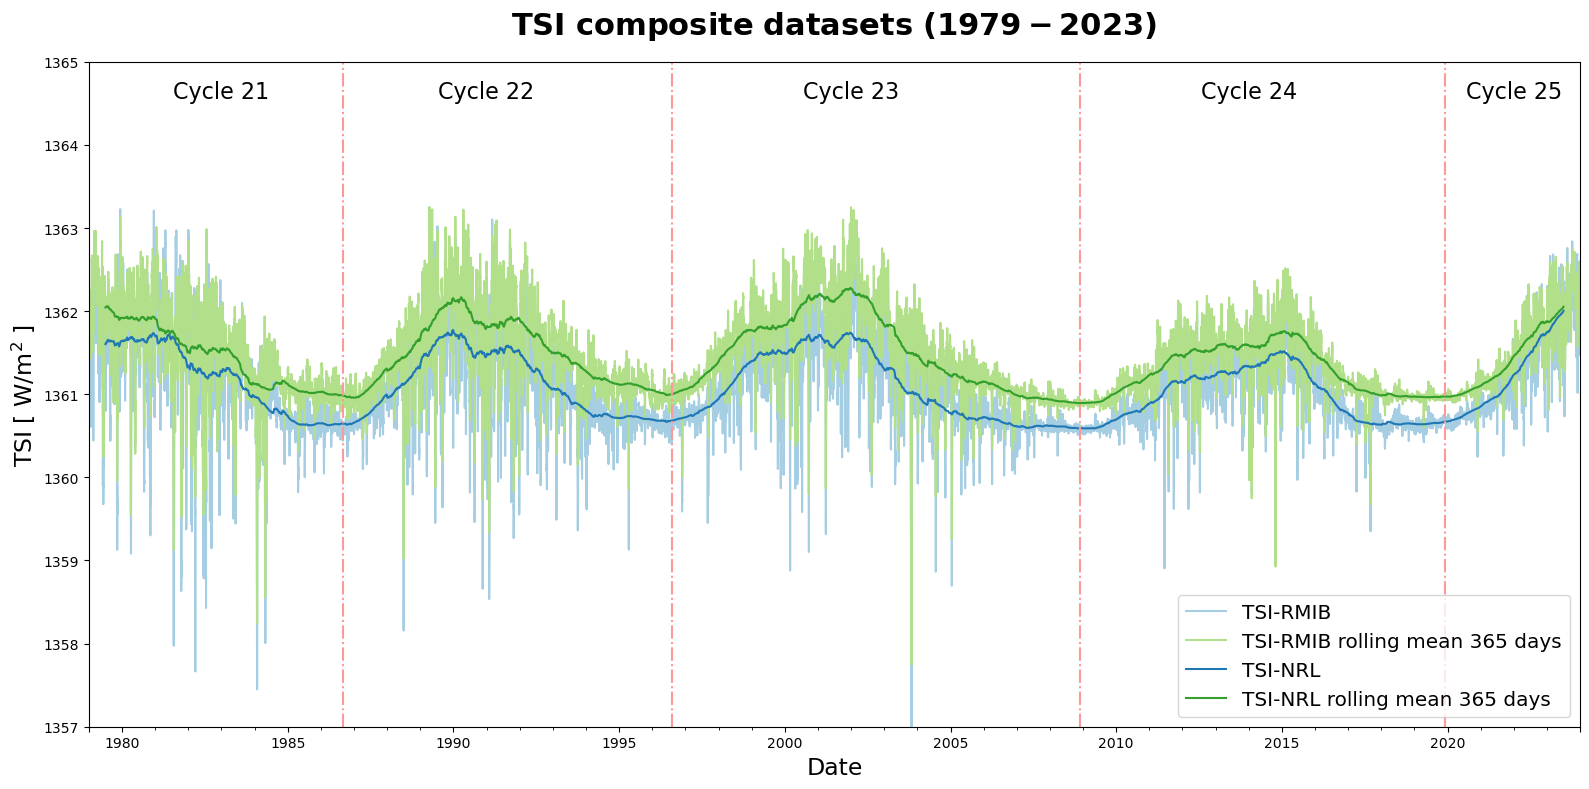

In [28]:
from matplotlib.font_manager import FontProperties

# Save figure and axes objects to modify later
fig2, ax2 = plt.subplots(1, 1, figsize=[16, 8])

# Actual plotting of the NRL data and the RMIB data
data_nrl.TSI.rolling(window=1).mean().plot(ax=ax2, color="#a6cee3")
data.TSI.rolling(window=1).mean().plot(ax=ax2, color="#b2df8a")
# Then 12-month rolling mean
data_nrl.TSI.rolling(window=365, center=True).mean().plot(ax=ax2, color="#1f78b4")
data.TSI.rolling(window=365, center=True).mean().plot(ax=ax2, color="#33a02c")


# Adding title, x,y labels, and legend at lower right corner
ax2.set_ylim(1357,1365)
ax2.set_title('$\\bf{TSI\\ composite\\ datasets\\ (1979-2023)}$',fontsize=22, pad = 20)

ax2.set_ylabel('TSI [ W/m$^2$ ]',fontsize=17,)
ax2.set_xlabel('Date',fontsize=17)
ax2.legend(
    ["TSI-RMIB", "TSI-RMIB rolling mean 365 days", "TSI-NRL", "TSI-NRL rolling mean 365 days"], 
    loc="lower right", 
    fontsize='x-large'
)

# Adding vertical lines and labels to distinguish solar cycles
ax2.axvline(pd.to_datetime('1986-09-01'), color="#fb9a99", linestyle="-.")
ax2.axvline(pd.to_datetime('1996-08-01'), color="#fb9a99", linestyle="-.")
ax2.axvline(pd.to_datetime('2008-12-01'), color="#fb9a99", linestyle="-.")
ax2.axvline(pd.to_datetime('2019-12-01'), color="#fb9a99", linestyle="-.")
ax2.text(pd.to_datetime('1983-01-01'), 1364.5, "Cycle 21", ha="center", va="bottom", color="k", fontsize=16)
ax2.text(pd.to_datetime('1991-01-01'), 1364.5, "Cycle 22", ha="center", va="bottom", color="k", fontsize=16)
ax2.text(pd.to_datetime('2002-01-01'), 1364.5, "Cycle 23", ha="center", va="bottom", color="k", fontsize=16)
ax2.text(pd.to_datetime('2014-01-01'), 1364.5, "Cycle 24", ha="center", va="bottom", color="k", fontsize=16)
ax2.text(pd.to_datetime('2022-01-01'), 1364.5, "Cycle 25", ha="center", va="bottom", color="k", fontsize=16)

plt.tight_layout()
plt.show()

# and save the figure
fig2.savefig('Example_2_TSI_SideBySide.png', dpi=300, bbox_inches='tight')

## Get more information about Earth Radiation Budget:

- [About Earth's radiation budget from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-earth-radiation-budget?tab=overview)
- [About the Climate Data Store](https://cds.climate.copernicus.eu/)
- [About the Toolbox documentation](https://cds.climate.copernicus.eu/toolbox/doc/index.html)

### Acknowledgments

The results presented in this document rely on data from the Naval Research Laboratory Total Solar Irradiance 2 (NRLTSI2) model described in Coddington et al. 2016 (https://doi.org/10.1175/BAMS-D-14-00265.1). These data were accessed via the LASP Interactive Solar Irradiance Datacenter (LISIRD) (https://lasp.colorado.edu/lisird/).

## References

Clerbaux N., (2023) Earth Radiation Budget TSI TOA. Copernicus Climate Change Service. https://confluence.ecmwf.int/x/AFMiEg

Dewitte, S., & Nevens, S. (2016). The Total Solar Irradiance Climate Data Record. The Astrophysical Journal, 830(1), 25. https://doi.org/10.3847/0004-637X/830/1/25.

Clerbaux, N., Velazquez Blazquez, A. (RMIB), 2023, C3S Earth Radiation Budget TSI Service: Product User Guide and Specification. Copernicus Climate Change Service, Document ref. C3S2_D312a_Lot1.2.2.6-v1.0_202303_PUGS_ECVEarthRadiationBudget_v1.1
https://confluence.ecmwf.int/x/KFMiEg